In [1]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")

In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Preprocessing

In [9]:
# Ubah nama kolom agar lebih seragam
data = data.rename(columns={"Gender":"gender","Age":"age",
                        "Annual Income (k$)":"annual_income","Spending Score (1-100)":"spending_score"})
data.head(2)

# Menghilangkan kolom CustomerID dan gender
#data.drop(["CustomerID","gender"], axis=1, inplace=True)

x = data
x.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#Import library k means

In [12]:
from sklearn.cluster import KMeans

# Mencari nilai k yang sesuai
inertia = []
for i in range(1,8):
  km = KMeans(n_clusters=i).fit(x)
  inertia.append(km.inertia_)

#Plot the inertia

Text(0, 0.5, 'Inertia')

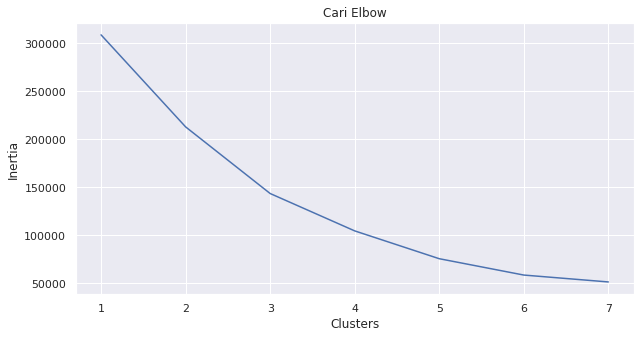

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x=list(range(1,8)), y=inertia)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#K = 5

In [30]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

In [33]:
# Menambah kolom pada dataframe untuk label
x['Labels'] = km5.labels_

x.tail()

,age,annual_income,spending_score,Labels
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1
199,30,137,83,2


#Plot hasil Cluster

Text(0.5, 1.0, 'KMeans dengan 5 Cluster')

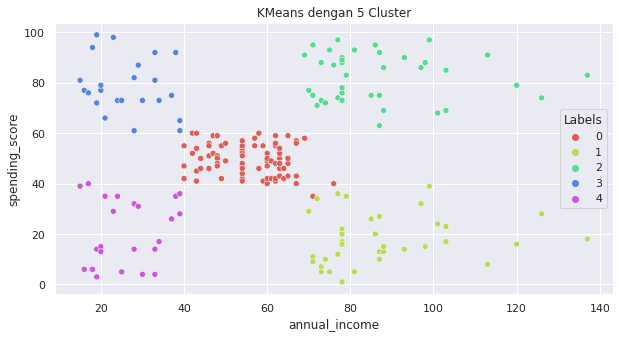

In [35]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot(x=x["annual_income"], y=x["spending_score"], hue=x["Labels"], palette=sns.color_palette('hls', 5))
ax.set_title('KMeans dengan 5 Cluster')

Text(0.5, 1.0, 'KMeans dengan 5 Cluster')

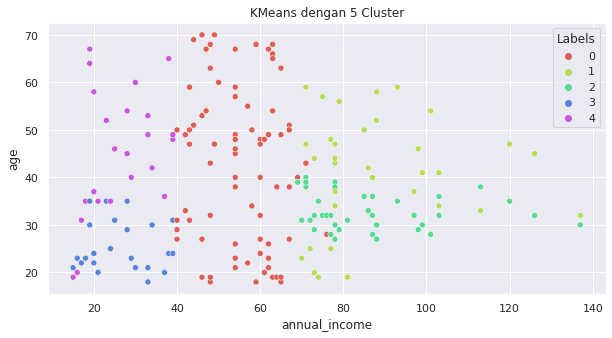

In [36]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot(x=x["annual_income"], y=x["age"], hue=x["Labels"], palette=sns.color_palette('hls', 5))
ax.set_title('KMeans dengan 5 Cluster')